# Notebook to analyze Scielo Data

In [1]:
# Boring but neccesary imports
%matplotlib inline
import matplotlib.pyplot as plt
import ingest_scielo 
import analyze
import networkx as nx

## Ingest the data into a data frame using the library

In [2]:
df = ingest_scielo.ingest_wos_scielo_folder()
print('Number of records ingested: ',len(df))

Encoding:  UTF-8-SIG
Number of records ingested:  15483


In [21]:
df.columns

Index(['publication type', 'authors', 'editors', 'title', 'spanish title',
       'portuguese title', 'other language title', 'source', 'language',
       'document type', 'english author keywords', 'spanish author Keywords',
       'portuguese author keywords', 'other language author keywords',
       'abstract', 'spanish abstract', 'portuguese abstract',
       'other language abstract', 'addresses', 'emails ', 'research id number',
       'orchid id', 'cited references', 'cited references count',
       'scielo citation index times cited count', 'total times cited count',
       'usage count 180', 'usage count 2013', 'publisher', 'publisher city',
       'publisher address', 'issn', 'pub date', 'pub year', 'volume', 'issue',
       'beggining page', 'ending page', 'doi', 'scielo categories',
       'scielo collection', 'research areas', 'accession number',
       'open access indicator', 'highly cited', 'hot paper', 'report date'],
      dtype='object')

In [24]:
df['scielo citation index times cited count']

0      0
1      3
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: scielo citation index times cited count, Length: 15483, dtype: int64

In [25]:
df['total times cited count']

0      0
1      4
2      2
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: total times cited count, Length: 15483, dtype: int64

## Now unpack the data frame into dictionaries (authors, papers, institutions)
The output corresponds to fields with insufficient information to extract a country.
(tdl)This probably should go to a log file.

In [3]:
authors, papers, institutions = ingest_scielo.get_scielo_dicts(df)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.8/logging/__init__.py", line 1081, in emit
    msg = self.format(record)
  File "/usr/lib/python3.8/logging/__init__.py", line 925, in format
    return fmt.format(record)
  File "/usr/lib/python3.8/logging/__init__.py", line 664, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.8/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/gino/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/gino/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 837, in launch_instance
    app.s

0


In [5]:
inst_list=sorted(list(institutions.keys()))

# Usage Examples

## Simple Stats

In [8]:
print('Number of authors: ',len(authors))
print(f'Number of publications: {len(papers):,}')
print(f'Number of institutions: {len(institutions):,}')

Number of authors:  45777
Number of publications: 15,483
Number of institutions: 7,001


## List of countries

In [19]:
country_list = [institutions[inst]['country'] for inst in institutions]
country_list = list(set(country_list))
country_list = sorted(country_list)

print(f'Number of countries: {len(country_list):,}')
print('Country List: ', country_list)

Number of countries: 66
Country List:  ['Angola', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Lithuania', 'Macedonia', 'Mexico', 'Mozambique', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'No country available', 'Norway', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Russia', 'Saudi Arabia', 'Serbia', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'USA', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Venezuela', 'Vietnam']


## Most prolific overall authors

In [10]:
# Create an ordered list of authors and their number of published papers
auth_prod = [(author, len(authors[author]['papers_list']))
             for author in authors]
auth_prod = sorted(auth_prod, key=lambda x: x[1], reverse=True)

<IPython.core.display.Javascript object>


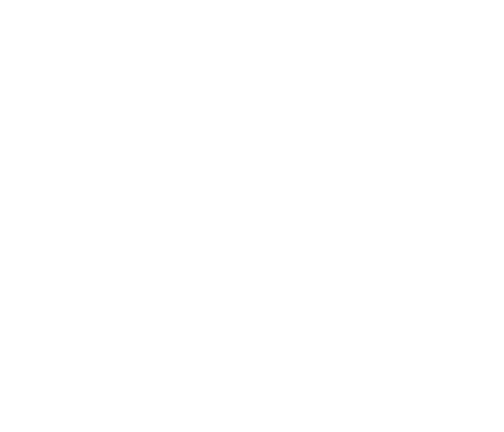

In [11]:
# Visualize the top 10 authors
%matplotlib notebook
n_authors = 20
top_authors = [author for (author,value) in auth_prod[0:n_authors]]
pubs_total  = [value for (author,value) in auth_prod[0:n_authors]]
authors_pos = [ i for i in range(n_authors)]

plt.rcParams['figure.figsize'] = [7, 6]
plt.bar(authors_pos, pubs_total)
plt.xticks(authors_pos, top_authors)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Most prolific authors')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.show()

## Rank countries by paper output

In [12]:
country_papers = ingest_scielo.get_country_papers_count(papers, institutions)

In [13]:
# Top countries
country_ranking = [(country, paper_number) for (country, paper_number) in country_papers.items()]
country_ranking = sorted(country_ranking, key=lambda x:x[1], reverse=True)

<IPython.core.display.Javascript object>


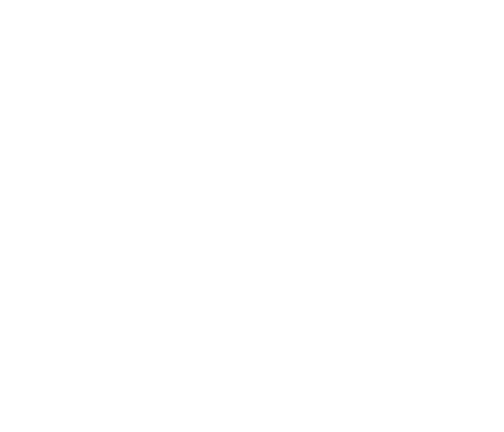

In [14]:
# Visualize the top 20 countries
%matplotlib notebook
n_countries = 20
top_countries = [item[0] for item in country_ranking[0:n_countries]]
pubs_total  =   [item[1]  for item in country_ranking[0:n_countries]]
country_pos = [ i for i in range(n_countries)]

plt.rcParams['figure.figsize'] = [7, 6]
plt.bar(country_pos, pubs_total)
plt.xticks(country_pos, top_countries)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Most prolific countries')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.show()

In [15]:
country_ranking

[('Brazil', 8338),
 ('No country available', 2065),
 ('Spain', 1319),
 ('Colombia', 1250),
 ('Mexico', 942),
 ('Chile', 679),
 ('Portugal', 542),
 ('Cuba', 488),
 ('Argentina', 405),
 ('USA', 315),
 ('Venezuela', 245),
 ('Peru', 153),
 ('Costa Rica', 102),
 ('Ecuador', 101),
 ('United Kingdom', 91),
 ('Canada', 75),
 ('France', 68),
 ('Uruguay', 54),
 ('Italy', 54),
 ('Paraguay', 36),
 ('Germany', 36),
 ('Australia', 32),
 ('Bolivia', 32),
 ('Iran', 26),
 ('China', 21),
 ('Turkey', 21),
 ('Sweden', 17),
 ('India', 16),
 ('Serbia', 15),
 ('Jamaica', 13),
 ('Switzerland', 13),
 ('Belgium', 12),
 ('Honduras', 9),
 ('Poland', 9),
 ('Greece', 9),
 ('Japan', 9),
 ('Denmark', 8),
 ('Croatia', 7),
 ('Netherlands', 7),
 ('Macedonia', 7),
 ('Austria', 7),
 ('Norway', 7),
 ('Guatemala', 6),
 ('Finland', 6),
 ('Russia', 6),
 ('Lithuania', 5),
 ('Mozambique', 5),
 ('Nigeria', 4),
 ('Puerto Rico', 4),
 ('Angola', 3),
 ('South Africa', 3),
 ('Slovenia', 3),
 ('Nicaragua', 3),
 ('Vietnam', 3),
 ('Unit

## Create simple co-authorship graphs

In [16]:
G_coauthors = analyze.get_coauthorship_graph(papers, authors, papers_filter=3)

Number of nodes  2458
Number of edges to add:  6866


<IPython.core.display.Javascript object>


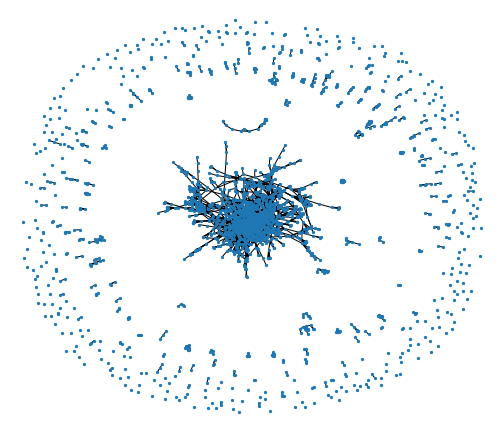

In [17]:
%matplotlib notebook
nx.draw(G_coauthors, with_labels=False, node_size=5)
plt.show()

In [18]:
#                     Upcoming code improvements 
# * Library structure (pip install kind of functionality)